# Exploratory Data Analysis for Charging Events

## 1. import data

I have imported and loaded the data as Pandas dataframe.

In [55]:
import pandas as pd
path = "data/Charging_events_data - charging_events_meter_reading.csv"
df = pd.read_csv(path)
df.head()

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name
0,24.08.2018 09:50,50,50.00,0.00,37,NaN
1,24.08.2018 09:51,50,50.00,0.00,38,NaN
2,24.08.2018 09:51,73,118.52,45.52,56,NaN
3,24.08.2018 09:53,105,116.66,11.66,76,NaN
4,24.08.2018 09:54,121,144.77,23.77,19,NaN


## 2. Preprocessing

In [56]:
df.describe()

,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s)
count,2.770000e+02,2.770000e+02,277.000000,2.770000e+02
mean,3.968875e+05,4.030848e+05,6197.316318,9.651005e+04
std,3.912772e+05,3.892371e+05,12260.182878,3.472706e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,6.900900e+04,7.866592e+04,0.000000,1.200000e+01
50%,1.932000e+05,2.007288e+05,1380.280000,5.704000e+03
75%,7.430480e+05,7.508278e+05,6822.500000,7.343900e+04
max,1.204911e+06,1.204935e+06,126350.920000,3.020411e+06


According to the information provided by df.describe() above, we can observe that there are unnecessary rows in the dataset, e.g., rows where the Meter Total equals 0 and rows where the Total Duration equals 0. These rows are the situations where the "charging" did not happen, and the EV is not charged at all. Hence, we need to drop these rows. If we kept these rows, when we perform calculations relevant to "mean" or "median", the result would be biased.

Moreover, although 'Start Time' denotes the time that each charging event happened, it is in Object(string) format. Therefore, to facilitate the process for time-series analysis in the following steps, it would be better if we convert 'Start Time' to the date_time data type in Pandas and set it as our index.

In [58]:
df_dropped_zero = df[(df['Total Duration (s)']!=0) & (df['Meter Total(Wh)']!=0)] #drop roles where charging did not happen
df_dropped_zero['Start Time'] = pd.to_datetime(df_dropped_zero['Start Time']) #convert to date time data type
df_dropped_zero.set_index('Start Time', inplace=True)
df_dropped_zero

/var/folders/76/3s8ndvb92wb2y403vv_58mkh0000gn/T/ipykernel_94975/78571764.py:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_dropped_zero['Start Time'] = pd.to_datetime(df_dropped_zero['Start Time'])
/var/folders/76/3s8ndvb92wb2y403vv_58mkh0000gn/T/ipykernel_94975/78571764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped_zero['Start Time'] = pd.to_datetime(df_dropped_zero['Start Time'])


,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name
Start Time,,,,,
2018-08-24 09:51:00,73,118.52,45.52,56,NaN
2018-08-24 09:53:00,105,116.66,11.66,76,NaN
2018-08-24 09:54:00,121,144.77,23.77,19,NaN
2018-08-27 09:16:00,39,483.18,444.18,515,NaN
2018-08-27 09:24:00,507,547.25,40.25,48,NaN
...,...,...,...,...,...
2019-09-09 05:47:00,0,33101.51,33101.51,6906,charger_1
2019-09-11 14:05:00,0,13807.38,13807.38,3726,charger_1
2019-09-12 11:05:00,0,35804.92,35804.92,7234,charger_1


## 3. time analysis

dt_df: dataframe that only contains meter total and total duration, which are used in the following plots.

In [104]:
dt_df = df_dropped_zero[['Meter Total(Wh)','Total Duration (s)']]

In [107]:
agg_hour = dt_df.groupby(dt_df.index.hour).median() #group by hour, calculate the median of other numeric columns
agg_hour['size'] = dt_df.groupby(dt_df.index.hour).size()
agg_hour

,Meter Total(Wh),Total Duration (s),size
Start Time,,,
3,3870.70,55140.0,1
4,4879.64,22586.0,1
5,9852.09,18944.0,5
6,7280.38,32632.0,11
7,5420.59,16860.0,15
8,1761.00,4886.0,17
9,687.03,2517.0,18
10,4273.80,19952.0,30
11,6518.61,70909.0,21


### 3.1 charging pattern by hour
in this section, I analyzed and plotted how charging patterns vary with different time in a day (different hours).

#### 3.1.1
First, let's see the number of charging events in different hours in a day:

/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'number of meters started by hours')

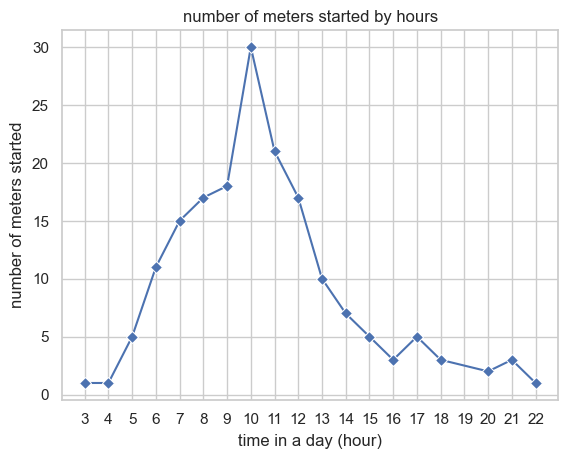

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "whitegrid")
x_ticks = range(agg_hour.index.min(), agg_hour.index.max() + 1)
ax_ms_hours = sns.lineplot(data = agg_hour, x = agg_hour.index, y='size',marker='D')
ax_ms_hours.set_xticks(x_ticks)
ax_ms_hours.set_xlabel("time in a day (hour)", fontsize=12, labelpad=5)
ax_ms_hours.set_ylabel("number of meters started", fontsize=12, labelpad=5)
ax_ms_hours.set_title("number of meters started by hours", fontsize=12)

According to the plot above, we can tell that most of the charging events occur between 6:00 to 13:00, and the peak of # of charging events happens at 10:00. If our data is collected without bias, then we can conclude that people tend to charge their EV in the morning and in the noon of a day. 

#### 3.1.2
Then, I would like to see how the amount of energy charged and the duration of charging events vary in different times in a day. I chose to use the median for these two columns to observe the varying pattern , because median is affected by outliers less than mean.

/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

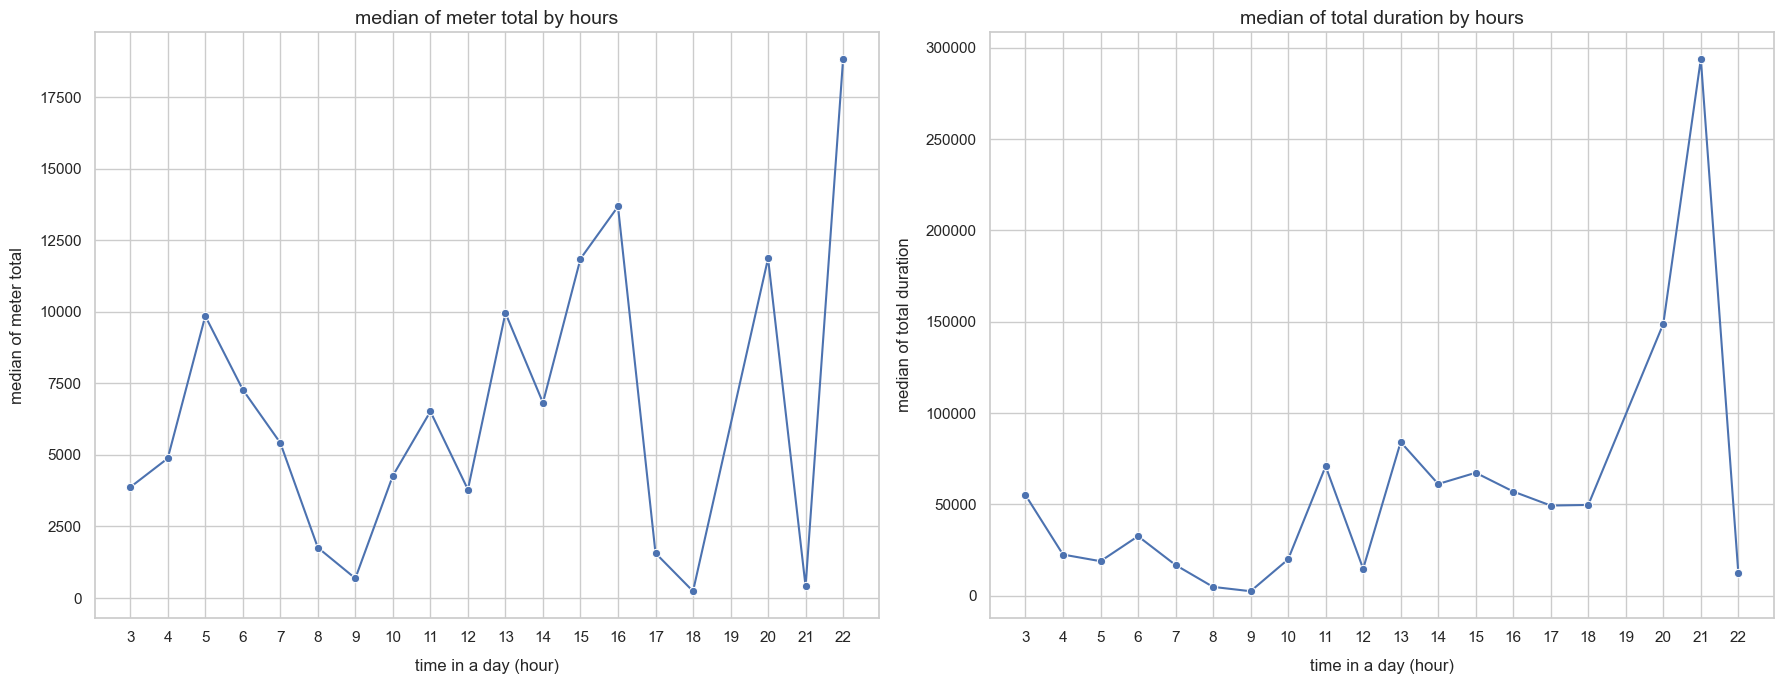

In [109]:
fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
sns.lineplot(ax = axes1[0], data = agg_hour, x = agg_hour.index, y='Meter Total(Wh)', marker='o')
axes1[0].set_xticks(x_ticks)
axes1[0].set_xlabel("time in a day (hour)", fontsize=12, labelpad=10)
axes1[0].set_ylabel("median of meter total", fontsize=12, labelpad=10)
axes1[0].set_title("median of meter total by hours", fontsize=14)

sns.lineplot(ax = axes1[1],data= agg_hour, x = agg_hour.index, y="Total Duration (s)", marker='o')
axes1[1].set_xlabel("time in a day (hour)", fontsize=12, labelpad=10)
axes1[1].set_ylabel("median of total duration", fontsize=12, labelpad=10)
axes1[1].set_title("median of total duration by hours", fontsize=14)
axes1[1].set_xticks(x_ticks)
plt.tight_layout()

In the plots above, we can tell that both median of meter total by hours and median of total duration by hours fluctuates dramatically. This is probably because we only have 175 rows of data after dropping non-charging events, which is insufficient for observing an unbiased pattern of charging duration and the amount of energy charged by times in a day as we have 20 different hours recorded in a day in our data. There is no trends presented in the plots above.

### 3.2 Charging pattern by days in a week

In the following plots, we analyze how the charging pattern varies by different days in a week.

In [110]:
agg_week = dt_df.groupby(dt_df.index.dayofweek).median()
agg_week['size'] = dt_df.groupby(dt_df.index.dayofweek).size()
agg_week.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
agg_week

,Meter Total(Wh),Total Duration (s),size
Mon,5249.970,25574.0,35
Tue,2594.150,49403.0,41
Wed,3834.405,15353.5,36
Thu,6556.715,51772.0,24
Fri,6038.615,13587.0,26
Sat,4989.310,78103.5,6
Sun,5819.650,55140.0,7


#### 3.2.1
First, I managed to plot the number of charging events (the number of meters started) vs. days in a week.

/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'number of meters started by day of week')

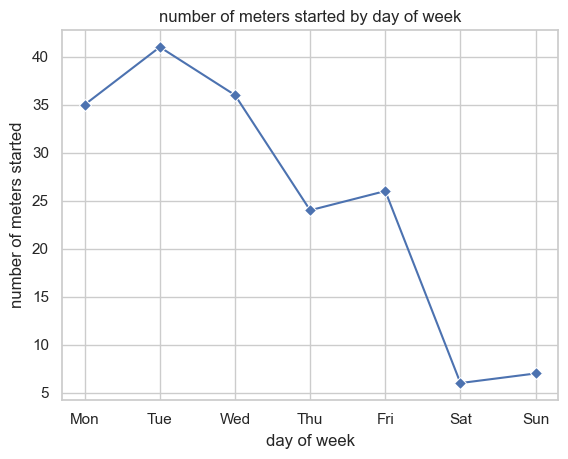

In [113]:
ax_days = sns.lineplot(data = agg_week, x = agg_week.index, y='size',marker='D')
ax_days.set_xlabel("day of week", fontsize=12, labelpad=5)
ax_days.set_ylabel("number of meters started", fontsize=12, labelpad=5)
ax_days.set_title("number of meters started by day of week", fontsize=12)

According to the plot above, people charge their EVs more during business days (Mon-Fri) than on weekends (Sat-Sun). Chances are people charge their vehicles to go to work more often than charging to go to travel.

#### 3.2.2
Next, I want to observe how the amount of energy charged and the charging duration vary by different days in a week.

/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

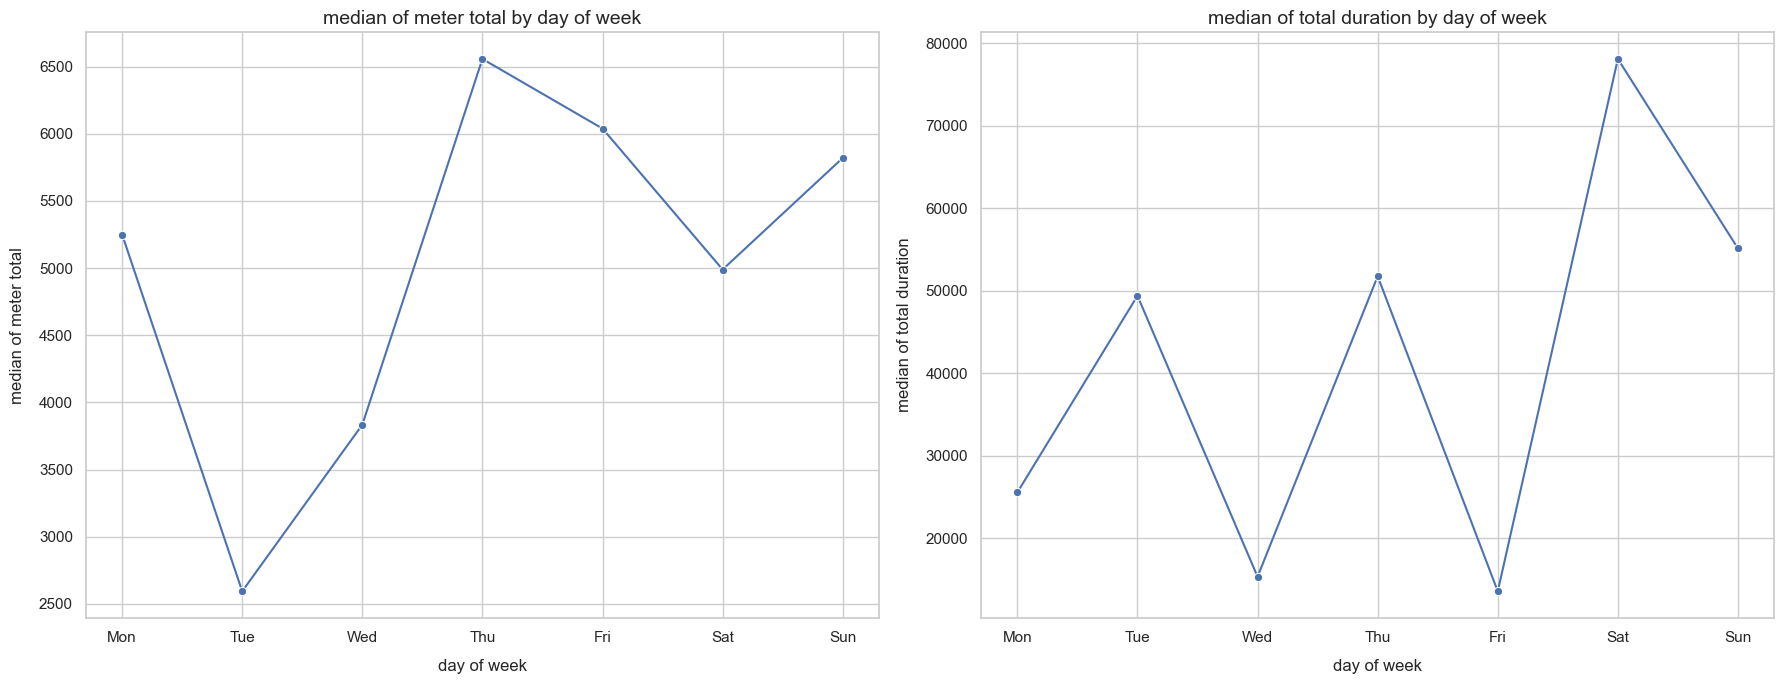

In [116]:
fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
sns.lineplot(ax = axes2[0], data = agg_week, x = agg_week.index, y='Meter Total(Wh)', marker='o')
axes2[0].set_xlabel("day of week", fontsize=12, labelpad=10)
axes2[0].set_ylabel("median of meter total", fontsize=12, labelpad=10)
axes2[0].set_title("median of meter total by day of week", fontsize=14)

sns.lineplot(ax = axes2[1],data= agg_week, x = agg_week.index, y="Total Duration (s)", marker='o')
axes2[1].set_xlabel("day of week", fontsize=12, labelpad=10)
axes2[1].set_ylabel("median of total duration", fontsize=12, labelpad=10)
axes2[1].set_title("median of total duration by day of week", fontsize=14)
plt.tight_layout()

According to the plots above, we can tell that there is no observable trend in the graph —— just like the plots in 3.1.2, this is probably due to insufficient data.

### 3.3 Charging pattern overtime

In this section, we group the charging data by months and present each charging pattern overtime.

In [117]:
all_time = dt_df.resample('M').median()
all_time['size'] = dt_df.resample('M').size()
all_time

,Meter Total(Wh),Total Duration (s),size
Start Time,,,
2018-08-31,53.740,141.0,8
2018-09-30,2292.990,30877.0,31
2018-10-31,5630.460,78714.0,16
2018-11-30,6338.840,64064.0,19
2018-12-31,6558.650,78108.0,9
2019-01-31,7028.760,75360.0,19
2019-02-28,NaN,NaN,0
2019-03-31,5701.840,14180.5,4
2019-04-30,1133.160,6412.0,7


#### 3.3.1
First, let's see how the number of charging events vary overtime:

/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'number of meters used by month overtime')

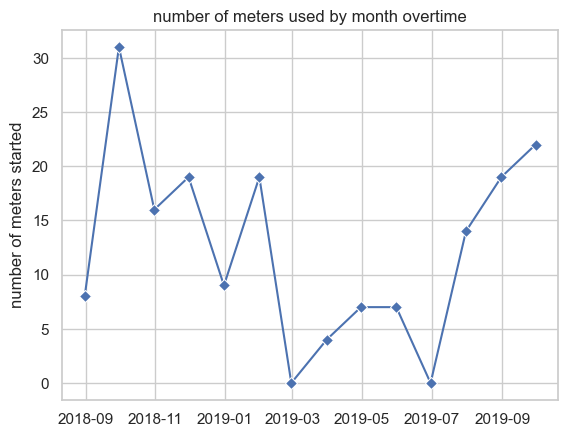

In [119]:
ax_days = sns.lineplot(data = all_time, x = all_time.index, y='size',marker='D')
ax_days.set_xlabel("")
ax_days.set_ylabel("number of meters started", fontsize=12, labelpad=5)
ax_days.set_title("number of meters used by month overtime", fontsize=12)

According to the plot above, there is a slump in terms of number of charging events between March 2019 to July 2019. 

#### 3.3.2
Next, let's observe the charging pattern in terms of meter total and total duration overtime.

/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/erchizhang/anaconda3/envs/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

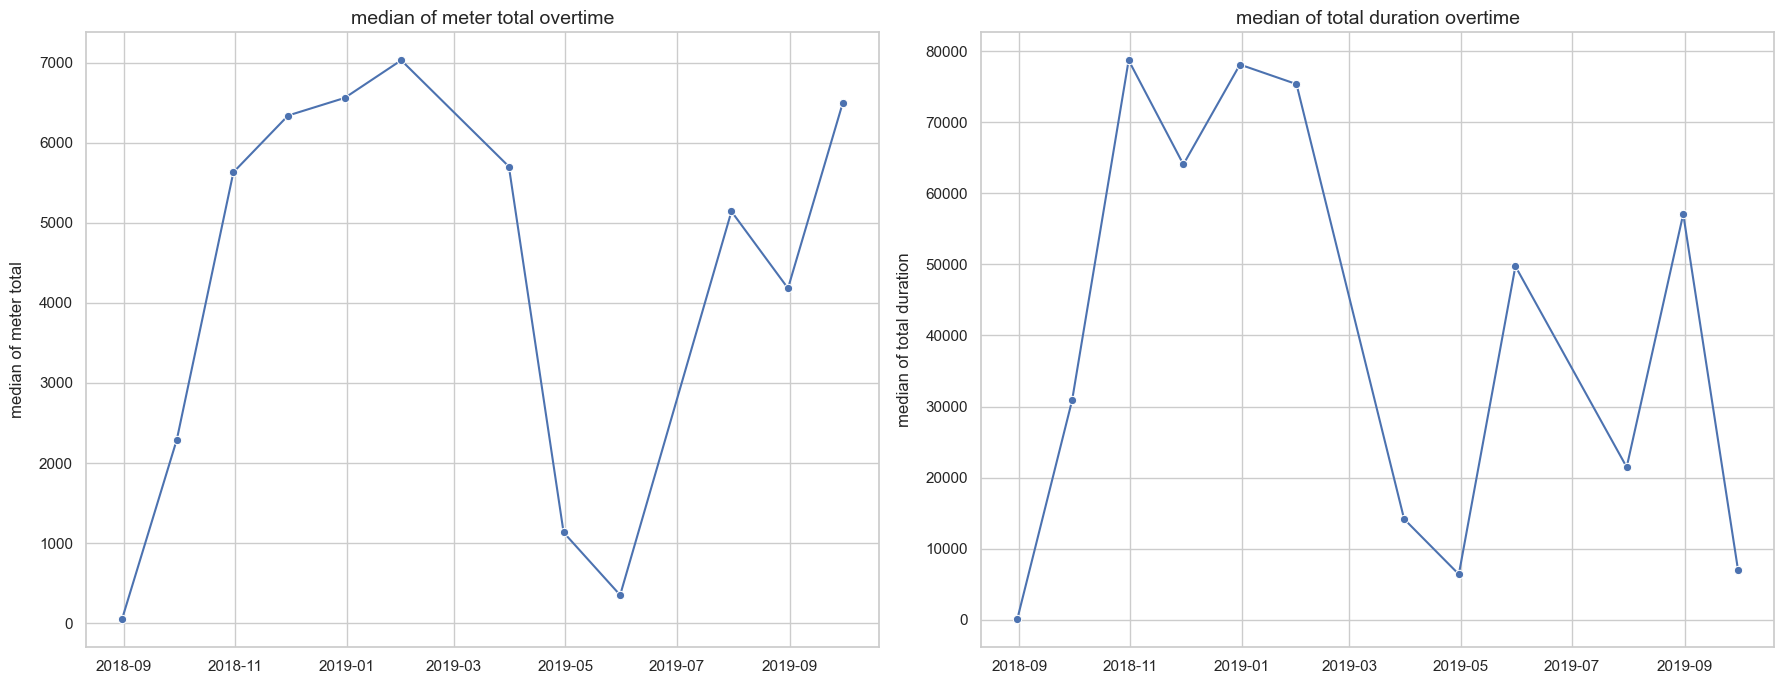

In [120]:
fig3, axes3 = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
sns.lineplot(ax = axes3[0], data = all_time, x = all_time.index, y='Meter Total(Wh)', marker='o')
axes3[0].set_xlabel('')
axes3[0].set_ylabel("median of meter total", fontsize=12, labelpad=10)
axes3[0].set_title("median of meter total overtime", fontsize=14)

sns.lineplot(ax = axes3[1],data= all_time, x = all_time.index, y="Total Duration (s)", marker='o')
axes3[1].set_xlabel('')
axes3[1].set_ylabel("median of total duration", fontsize=12, labelpad=10)
axes3[1].set_title("median of total duration overtime", fontsize=14)
plt.tight_layout()

According to the plots above, there are slumps during the summer of 2019. In summary, people did not charge as much as other time frames during the summer of 2019.

## 4. charger-wise analysis
In this section, I plotted and analyzed how charging behaviors vary by different chargers.

In [68]:
agg_charger = df_dropped_zero.groupby('Charger_name').agg(
    median_duration = ('Total Duration (s)','median'),
    median_meter_total = ('Meter Total(Wh)','median')
)
agg_charger['size'] = df_dropped_zero.groupby('Charger_name').size()
agg_charger=agg_charger.reset_index(names='charger')
agg_charger

,charger,median_duration,median_meter_total,size
0,charger_1,4795.0,25053.325,6
1,charger_10,89578.0,1702.080,5
2,charger_11,22779.0,2594.150,9
3,charger_12,158899.0,15913.700,3
4,charger_13,22137.0,1618.530,3
5,charger_14,15097.0,2475.670,7
6,charger_15,73515.0,5249.970,5
7,charger_16,5123.0,12059.190,3
8,charger_2,33893.5,5047.710,22
9,charger_3,32408.0,2292.990,27


In [122]:
#function for sorting all chargers in order
import re
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]
sorted_chargers = sorted(agg_charger['charger'].unique(),key=natural_sort_key)

Text(0.5, 1.0, 'number of charging events by charger')

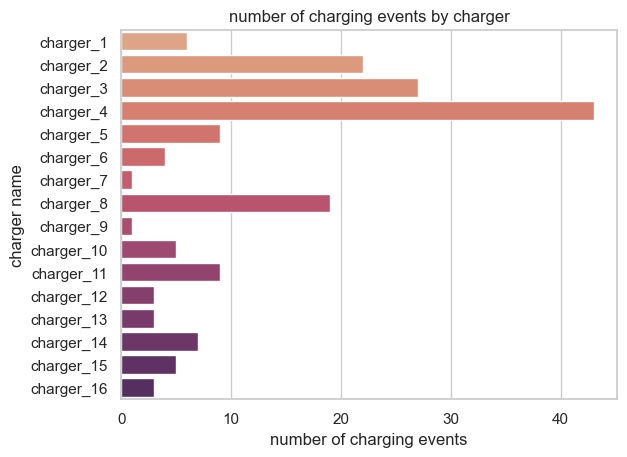

In [123]:
ax_size_charger = sns.barplot(x='size',y='charger',data=agg_charger,palette='flare',order=sorted_chargers)
ax_size_charger.set_xlabel("number of charging events")
ax_size_charger.set_ylabel("charger name")
ax_size_charger.set_title("number of charging events by charger")

plot number of meters started in each hour

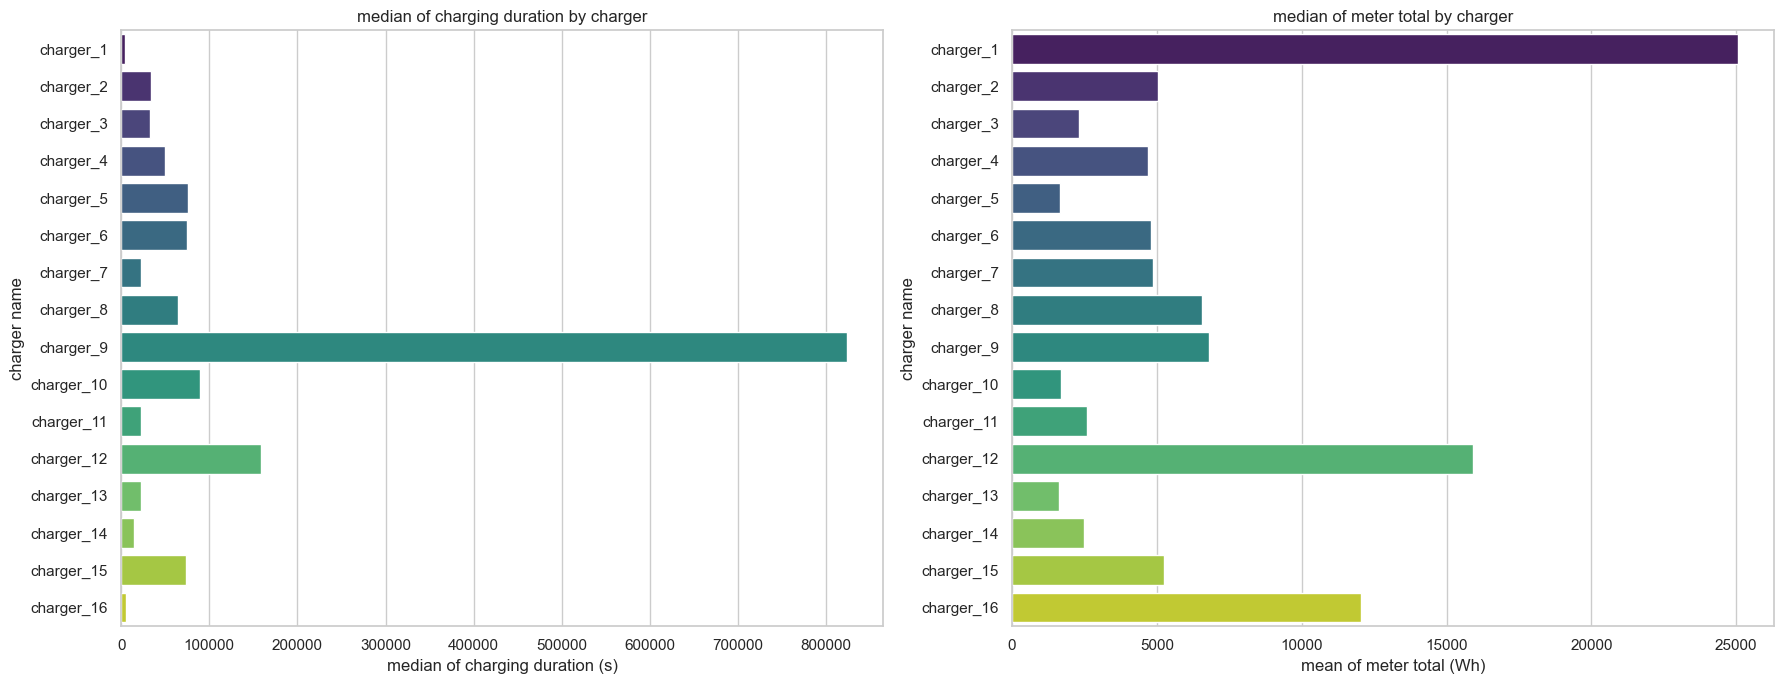

In [71]:
fig4, axes4 = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
# Plot for greatest damage costs
sns.barplot(x='median_duration', y='charger', data=agg_charger, ax=axes4[0], palette='viridis',order=sorted_chargers)
axes4[0].set_title('median of charging duration by charger')
axes4[0].set_xlabel('median of charging duration (s)')
axes4[0].set_ylabel('charger name')

# Plot for greatest injuries and deaths
sns.barplot(x='median_meter_total', y='charger', data=agg_charger, ax=axes4[1], palette='viridis',order=sorted_chargers)
axes4[1].set_title('median of meter total by charger')
axes4[1].set_xlabel('mean of meter total (Wh)')
axes4[1].set_ylabel('charger name')

plt.tight_layout()


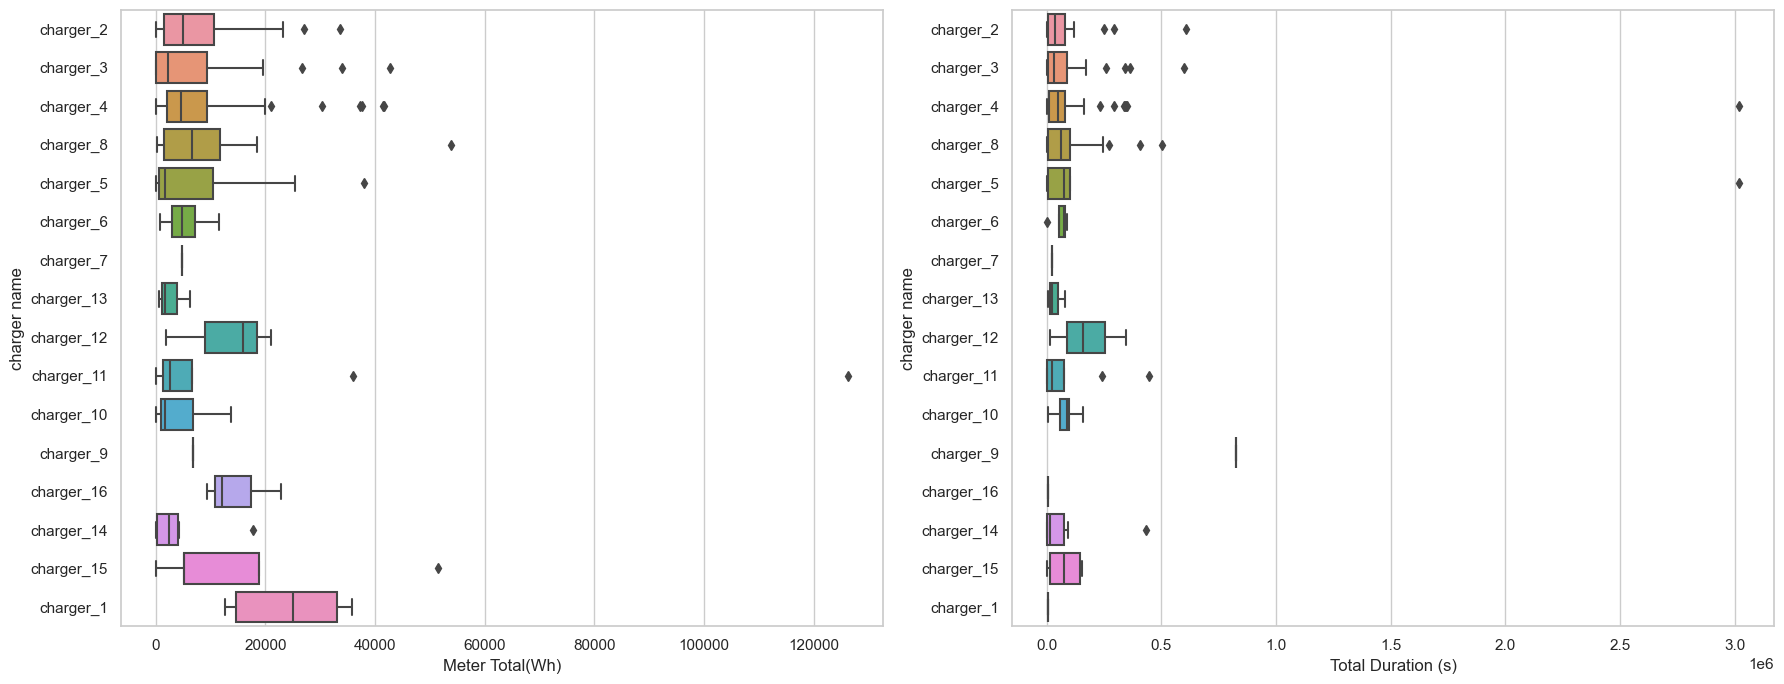

In [78]:
fig5, axes5 = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
sns.boxplot(ax=axes5[0], data=df_dropped_zero, x="Meter Total(Wh)", y="Charger_name")
axes5[0].set_ylabel('charger name')

sns.boxplot(ax=axes5[1], data=df_dropped_zero, x="Total Duration (s)", y="Charger_name")
axes5[1].set_ylabel('charger name')

plt.tight_layout()

examine correlations

<Axes: xlabel='Total Duration (s)', ylabel='Meter Total(Wh)'>

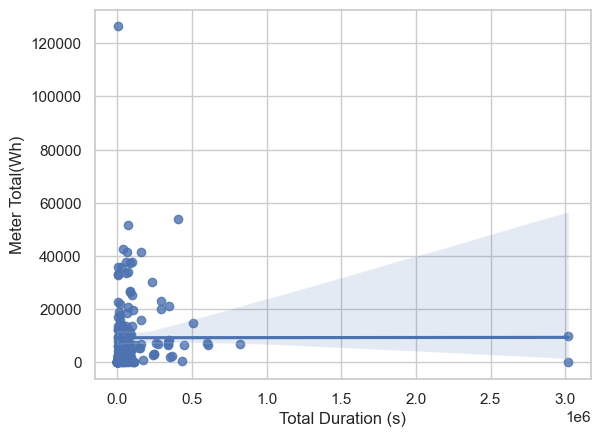

In [74]:
sns.regplot(data = df_dropped_zero, x="Total Duration (s)", y="Meter Total(Wh)")

In [75]:
from scipy import stats
df_dropped_zero['total_duration_zscore']=stats.zscore(df_dropped_zero['Total Duration (s)'])
df_dropped_zero['meter_total_zscore']=stats.zscore(df_dropped_zero['Meter Total(Wh)'])
df_dropped_zero

/var/folders/76/3s8ndvb92wb2y403vv_58mkh0000gn/T/ipykernel_94975/110082171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped_zero['total_duration_zscore']=stats.zscore(df_dropped_zero['Total Duration (s)'])
/var/folders/76/3s8ndvb92wb2y403vv_58mkh0000gn/T/ipykernel_94975/110082171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped_zero['meter_total_zscore']=stats.zscore(df_dropped_zero['Meter Total(Wh)'])


,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name,total_duration_zscore,meter_total_zscore
Start Time,,,,,,,
2018-08-24 09:51:00,73,118.52,45.52,56,NaN,-0.339574,-0.645902
2018-08-24 09:53:00,105,116.66,11.66,76,NaN,-0.339515,-0.648270
2018-08-24 09:54:00,121,144.77,23.77,19,NaN,-0.339684,-0.647423
2018-08-27 09:16:00,39,483.18,444.18,515,NaN,-0.338217,-0.618028
2018-08-27 09:24:00,507,547.25,40.25,48,NaN,-0.339598,-0.646271
...,...,...,...,...,...,...,...
2019-09-09 05:47:00,0,33101.51,33101.51,6906,charger_1,-0.319320,1.665365
2019-09-11 14:05:00,0,13807.38,13807.38,3726,charger_1,-0.328723,0.316324
2019-09-12 11:05:00,0,35804.92,35804.92,7234,charger_1,-0.318351,1.854387


In [85]:
import numpy as np
logged_dur = np.log(df_dropped_zero['Total Duration (s)'])
logged_meter = np.log(df_dropped_zero['Meter Total(Wh)'])

Text(0, 0.5, 'log(Meter Total (Wh))')

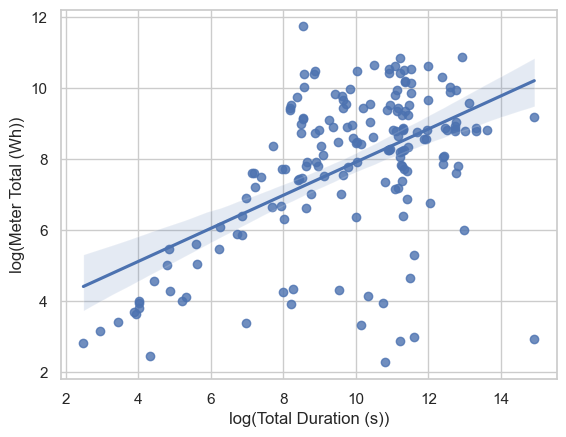

In [100]:
ax_dur_total = sns.regplot(x=logged_dur, y=logged_meter)
ax_dur_total.set_xlabel("log(Total Duration (s))")
ax_dur_total.set_ylabel("log(Meter Total (Wh))")

does a low meter_start means more charging?

Text(0, 0.5, 'log(Total Duration (s))')

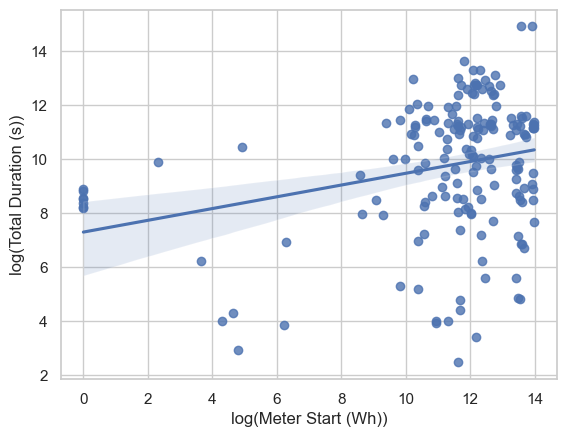

In [98]:
logged_start = [np.log(x) if x!=0 else 0 for x in df_dropped_zero['Meter Start (Wh)']]
ax_start_dur=sns.regplot(x=logged_start, y=logged_dur)
ax_start_dur.set_xlabel("log(Meter Start (Wh))")
ax_start_dur.set_ylabel("log(Total Duration (s))")
